In [32]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.io import fits, ascii

%matplotlib inline

In [44]:
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'data/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'

mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_massive = mist[(mist['initial_mass'] >= 8)]
mist_int = mist[(mist['initial_mass'] < 8)&(mist['initial_mass'] >= 5)]

In [25]:
data_file = 'data/highmass_wise.csv'
data = pd.read_csv(data_file)

(0, -10)

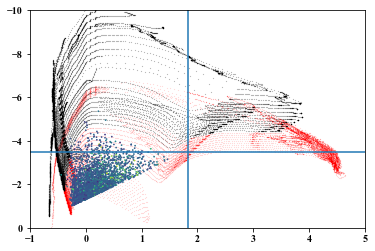

In [47]:
plt.scatter(mist_int['Gaia_BP_DR2Rev']-mist_int['Gaia_RP_DR2Rev'],mist_int['Gaia_G_DR2Rev'],s=1e-2,c='r',alpha=0.5)
plt.scatter(mist_massive['Gaia_BP_DR2Rev']-mist_massive['Gaia_RP_DR2Rev'],mist_massive['Gaia_G_DR2Rev'],s=1e-2,c='k')
plt.scatter(data['phot_bp_mean_mag']-data['phot_rp_mean_mag'],data['phot_g_mean_mag'] + 5*np.log10(data['parallax']) - 10,c=data['w1mpro']-data['w2mpro'],s=0.5)
plt.axvline(x=2.2/1.2)
plt.axhline(y=-3.5)
plt.xlim(-1,5)
plt.ylim(0,-10)